# STAT 202: Data Mining & Analysis Final Project    
**Summer 2021**    
**Savannah Mccoy** 
---
   

In [267]:
import csv
import pandas as pd
import os, sys, time
import turicreate as tc
import missingno as msno
import warnings
import itertools
import seaborn as sns


from datetime import datetime, timedelta

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator


warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [296]:
full_train_df = pd.read_csv('train_data.csv')

In [285]:
train_df = full_train_df.sample(frac=0.1, replace=False, random_state=1)

### Simple Analysis:

#### Calculate mean, median, min, max for target column

In [45]:
#  mean ,median, min, max 

print("Mean:", train_df.groupby('symbol')['open'].mean(), "\n")
print("Median:", train_df.groupby('symbol')['open'].median(), "\n")
print("Max:", train_df.groupby('symbol')['open'].max(), "\n")
print("Min:", train_df.groupby('symbol')['open'].min(), "\n")


# mode - create separate dataframes for each symbol

df_A = train_df[train_df["symbol"] == 'A']
df_B = train_df[train_df["symbol"] == 'B']
df_C = train_df[train_df["symbol"] == 'C']
df_D = train_df[train_df["symbol"] == 'D']
df_E = train_df[train_df["symbol"] == 'E']
df_F = train_df[train_df["symbol"] == 'F']
df_G = train_df[train_df["symbol"] == 'G']
df_H = train_df[train_df["symbol"] == 'H']
df_I = train_df[train_df["symbol"] == 'I']
df_J = train_df[train_df["symbol"] == 'J']

ticker_dfs = [df_A, df_B, df_C, df_D, df_E, 
              df_F, df_G, df_H, df_I, df_J]
tickers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
n = 0

for df in ticker_dfs:
    print(tickers[n]+":", "   --- Mode:", float(df['open'].mode()), "\n")
    n = n+1

Mean: symbol
A    141.080688
B    108.237546
C     97.062048
D    231.251612
E    121.914925
F    171.895547
G    175.638842
H     87.137610
I    175.408816
J    170.907911
Name: open, dtype: float64 

Median: symbol
A    140.59
B    108.13
C     96.65
D    226.84
E    122.24
F    170.91
G    177.81
H     88.32
I    178.47
J    167.86
Name: open, dtype: float64 

Max: symbol
A    151.98
B    116.42
C    105.21
D    258.45
E    132.25
F    195.35
G    186.18
H     93.23
I    189.60
J    195.98
Name: open, dtype: float64 

Min: symbol
A    130.68
B    100.18
C     87.94
D    209.74
E    112.01
F    155.52
G    154.91
H     77.05
I    160.02
J    162.36
Name: open, dtype: float64 

A:    --- Mode: 139.18 

B:    --- Mode: 110.24 

C:    --- Mode: 99.76 

D:    --- Mode: 230.61 

E:    --- Mode: 125.53 

F:    --- Mode: 171.29 

G:    --- Mode: 182.49 

H:    --- Mode: 89.5 

I:    --- Mode: 179.81 

J:    --- Mode: 166.85 



#### Examine Missing Values

In [46]:
# count missing values - each symbol should have 438,480
print('A:', str(438480 - len(df_A)), '\n'
      'B:', str(438480 - len(df_B)), '\n' 
      'C:', str(438480 - len(df_C)), '\n'
      'D:', str(438480 - len(df_D)), '\n' 
      'E:', str(438480 - len(df_E)), '\n' 
      'F:', str(438480 - len(df_F)), '\n'
      'G:', str(438480 - len(df_G)), '\n' 
      'H:', str(438480 - len(df_H)), '\n'
      'I:', str(438480 - len(df_I)), '\n'
      'J:', str(438480 - len(df_J)), '\n')

A: 11583 
B: 10571 
C: 0 
D: 1440 
E: 251 
F: 25849 
G: 1534 
H: 720 
I: 1440 
J: 1158 



#### Examine Target Column

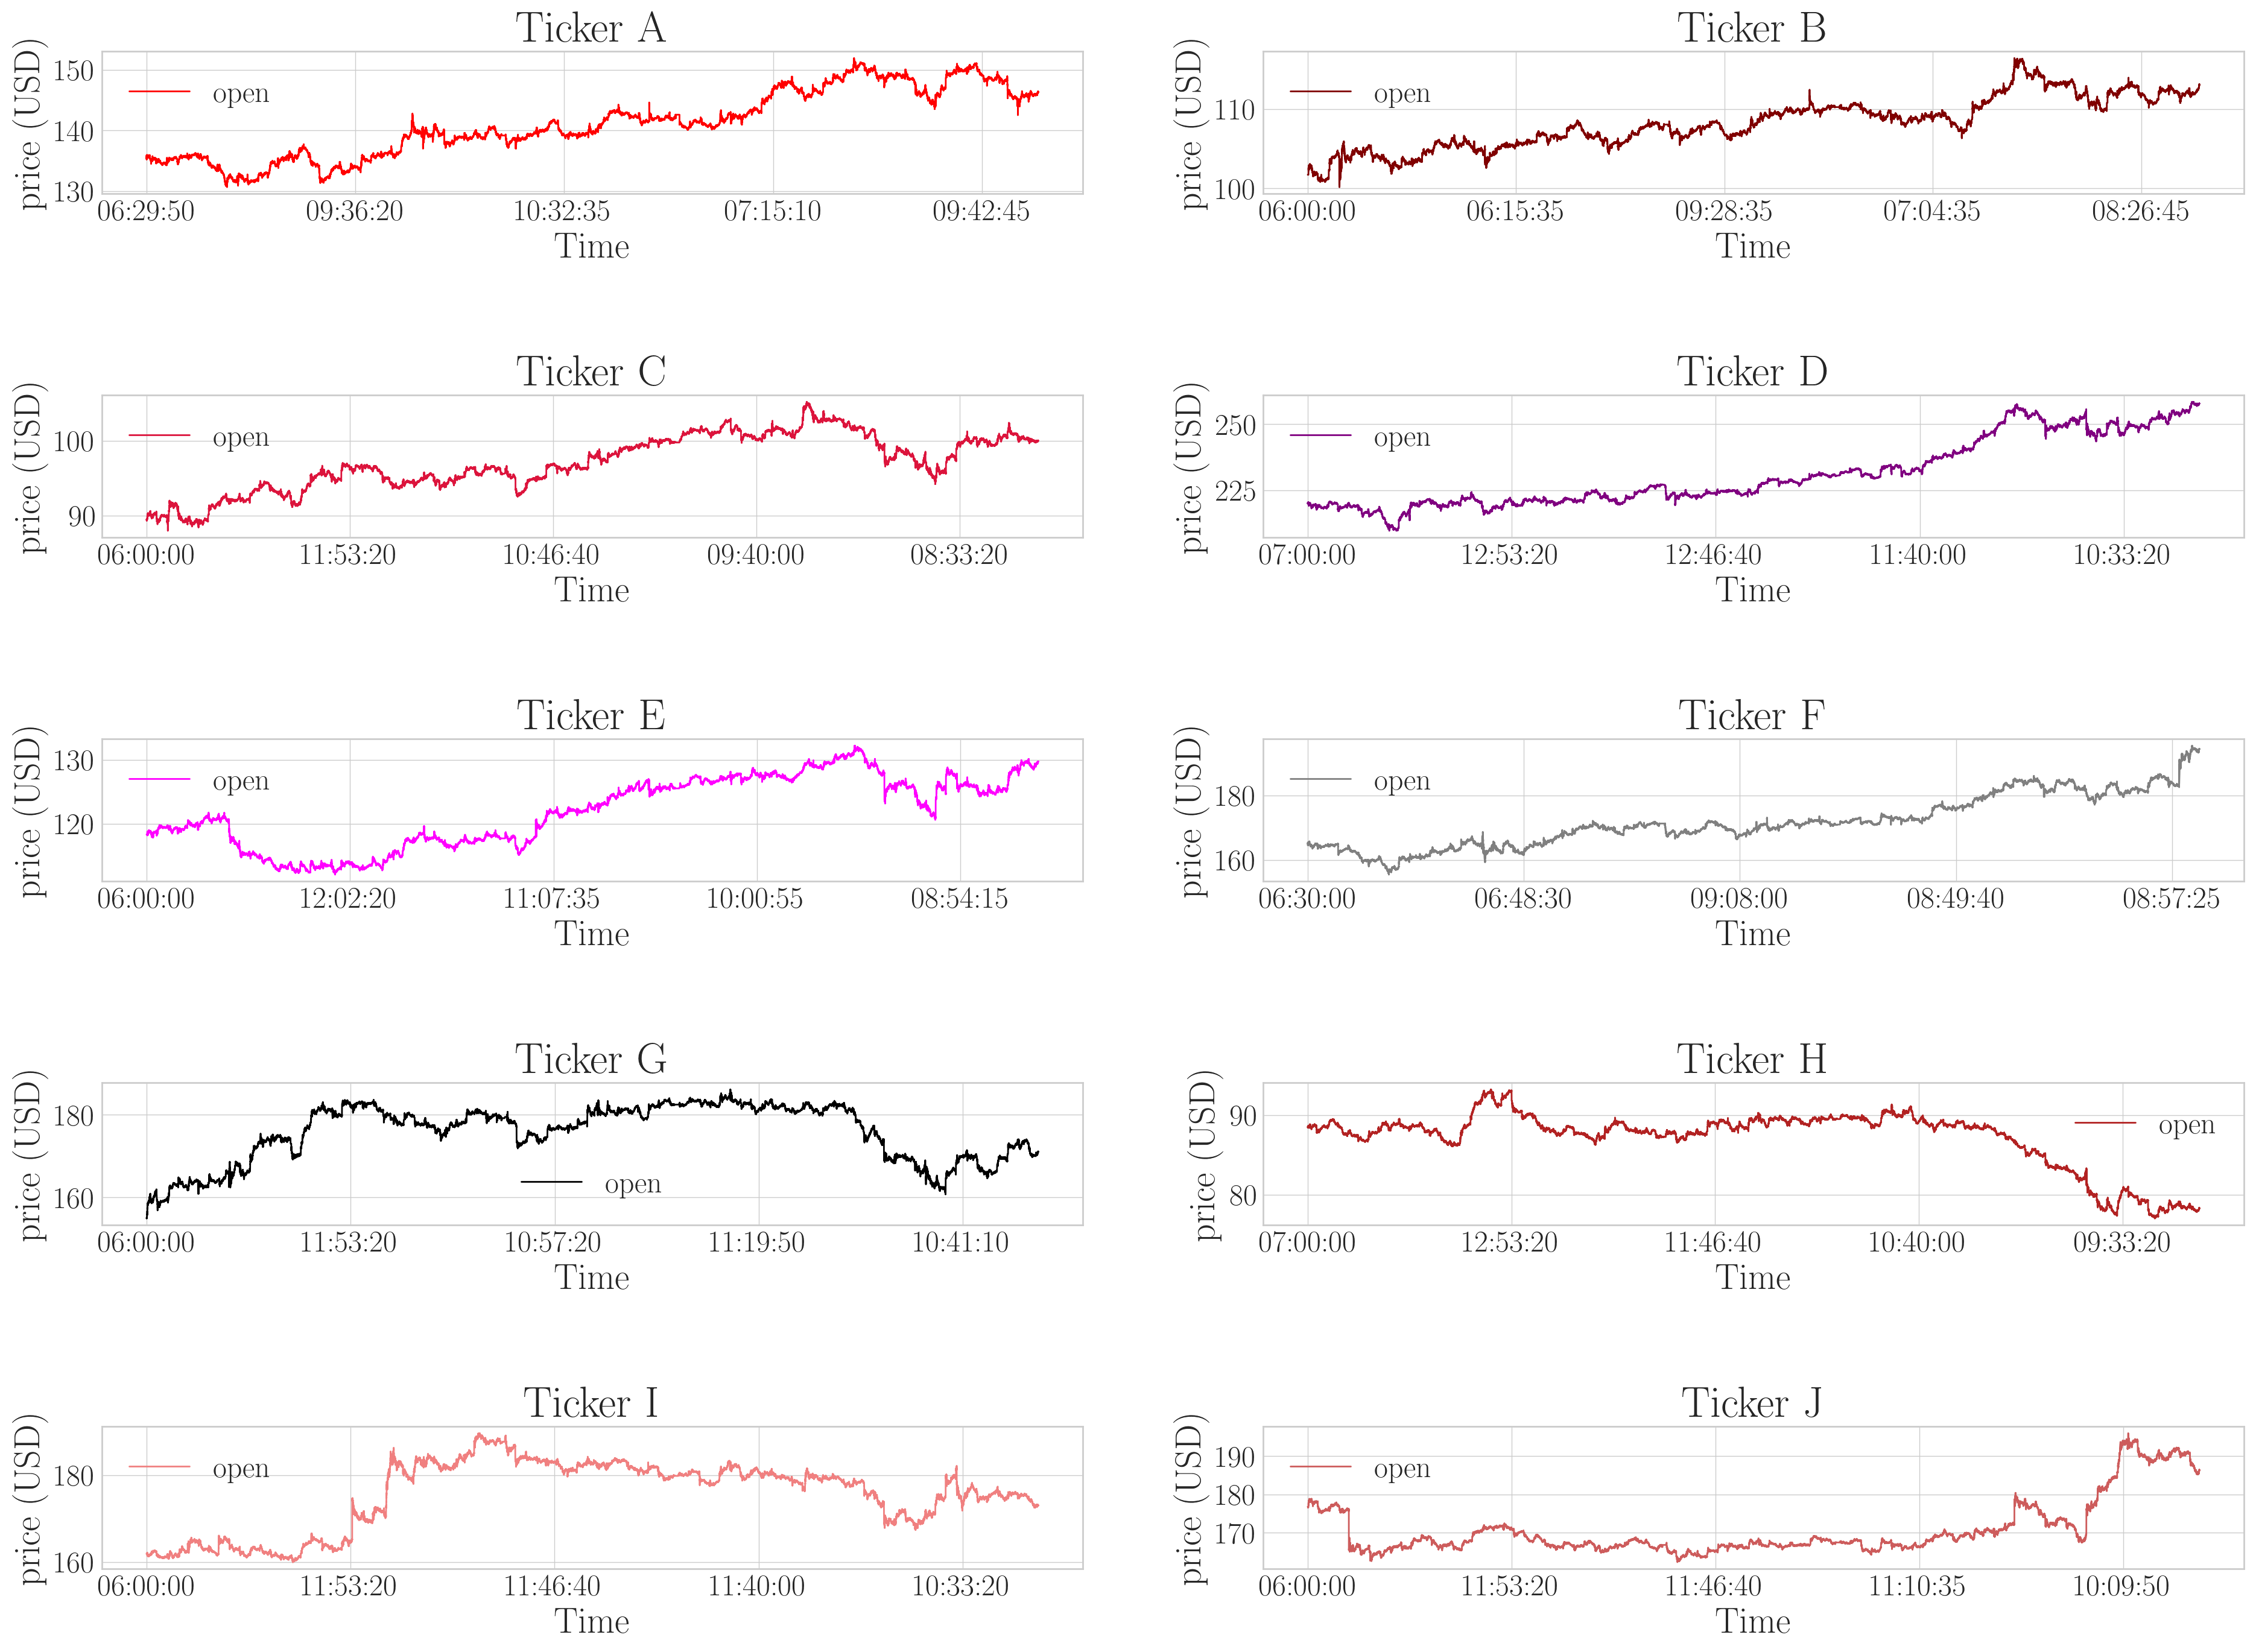

<Figure size 1200x800 with 0 Axes>

In [192]:
fig, axs = plt.subplots(5, 2)
plt.figure()
plt.rcParams.update({'font.size': 22})

tickers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

mpl.rcParams['figure.dpi']= 200
rc('text', usetex=True)
axs[0, 0].xaxis.set_major_locator(MaxNLocator(5)) 


matplotlib.rcParams['font.size'] = 18

df_A.plot('time', 'open', title = "Ticker "+tickers[0], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[0, 0], color='red', figsize=[20, 15], linewidth=1)

df_B.plot('time', 'open', title = "Ticker "+tickers[1], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[0, 1], color='maroon', linewidth=1)

df_C.plot('time', 'open', title = "Ticker "+tickers[2], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[1, 0], color='crimson', linewidth=1)

df_D.plot('time', 'open', title = "Ticker "+tickers[3], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[1, 1], color='purple', linewidth=1)

df_E.plot('time', 'open', title = "Ticker "+tickers[4], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[2, 0], color='magenta', linewidth=1)

df_F.plot('time', 'open', title = "Ticker "+tickers[5], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[2, 1], color='gray', linewidth=1)

df_G.plot('time', 'open', title = "Ticker "+tickers[6], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[3, 0], color='black', linewidth=1)

df_H.plot('time', 'open', title = "Ticker "+tickers[7], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[3, 1], color='firebrick', linewidth=1)

df_I.plot('time', 'open', title = "Ticker "+tickers[8], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[4, 0], color='lightcoral', linewidth=1)

df_J.plot('time', 'open', title = "Ticker "+tickers[9], xlabel = "Time", 
          ylabel = "price (USD)", ax = axs[4, 1], color='indianred', linewidth=1)


fig.tight_layout(pad=3.0)
fig.savefig('plots.png', dpi=200, bbox_inches='tight')
plt.show()

### Feature Engineering:

#### Create 5 addtional features to augment dataset
- Date from Jan 1 2001
- Day of the week - MTWThF
- Beginning of week - bool
- End of week - bool
- Morning/Afternoon/evening 

In [297]:
# measure day as date from 01/01/01

train_df['date'] = train_df['day'].apply(lambda x: (datetime.strptime('01/01/01', "%m/%d/%y") 
                                                + timedelta(days = x)).strftime("%m/%d/%Y"))
# combine with time to form new column

train_df['datetime'] = train_df['date'] + ", " + train_df['time']

In [298]:
# calculate Day of the week - MTWThF

weekdays = ['M', 'T', 'W', 'Th', 'F']
train_df['weekday'] = train_df['day'].apply(lambda day: weekdays[(day) % 5])

In [301]:
# beginning of week or end of week - bool column

train_df['week_begin'] = [int(x) for x in (train_df['weekday'] == 'M')]
train_df['week_end'] = [int(x) for x in (train_df['weekday'] == 'F')]

In [302]:
create categorical column based on time hr: there are ~ 7 hrs for each day

def get_time_of_day(time):
    if (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("07:00:00", '%H:%M:%S').time()):
        return 1
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("07:00:00", '%H:%M:%S').time()) and (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("08:00:00", '%H:%M:%S').time()):
        return 2
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("08:00:00", '%H:%M:%S').time()) and (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("09:00:00", '%H:%M:%S').time()):
        return 3
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("09:00:00", '%H:%M:%S').time()) and (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("10:00:00", '%H:%M:%S').time()):
        return 4
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("10:00:00", '%H:%M:%S').time()) and (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("11:00:00", '%H:%M:%S').time()):
        return 5
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("11:00:00", '%H:%M:%S').time()) and (datetime.strptime(time, '%H:%M:%S').time() 
    < datetime.strptime("12:00:00", '%H:%M:%S').time()):
        return 6
    elif (datetime.strptime(time, '%H:%M:%S').time() 
    >= datetime.strptime("12:00:00", '%H:%M:%S').time()):
        return 7
    return 0
    
train_df['hr'] = train_df['time'].apply(lambda t: get_time_of_day(t))

In [ ]:
# create bool column for am/pm
train_df['am_pm'] = [int(x) for x in train_df['hr'] == 7]

In [303]:
train_df

,symbol,open,high,low,close,average,time,day,date,datetime,weekday,week_begin,week_end
0,B,101.72,101.72,101.72,101.72,101.72,06:00:00,0,01/01/2001,"01/01/2001, 06:00:00",M,1,0
1,B,101.72,101.72,101.72,101.72,101.72,06:00:05,0,01/01/2001,"01/01/2001, 06:00:05",M,1,0
2,B,101.72,101.72,101.72,101.72,101.72,06:00:10,0,01/01/2001,"01/01/2001, 06:00:10",M,1,0
3,B,101.72,101.72,101.72,101.72,101.72,06:00:15,0,01/01/2001,"01/01/2001, 06:00:15",M,1,0
4,B,101.72,101.72,101.72,101.72,101.72,06:00:20,0,01/01/2001,"01/01/2001, 06:00:20",M,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330249,H,78.26,78.29,78.25,78.29,78.28,12:59:35,86,03/28/2001,"03/28/2001, 12:59:35",T,0,0
4330250,H,78.28,78.29,78.28,78.29,78.28,12:59:40,86,03/28/2001,"03/28/2001, 12:59:40",T,0,0
4330251,H,78.29,78.30,78.28,78.30,78.29,12:59:45,86,03/28/2001,"03/28/2001, 12:59:45",T,0,0
4330252,H,78.29,78.30,78.26,78.26,78.29,12:59:50,86,03/28/2001,"03/28/2001, 12:59:50",T,0,0


In [276]:
train_df.dtypes

symbol         object
open          float64
high          float64
low           float64
close         float64
average       float64
time           object
day             int64
date           object
datetime       object
weekday        object
week_begin      int64
week_end        int64
hr              int64
am_pm           int64
dtype: object

## Correlations/Trend Analysis

#### Pairs plot

In [32]:
# sample pirs plot of ticker F
sns.pairplot(df_F)

#### Encode categorical variables  

In [54]:
df_F2 = pd.get_dummies(df_F, columns=['symbol', 'time', 'weekday'])

In [55]:
# drop datetime because it is too varied to be categorical
df_F2 = df_F2.drop(columns=['datetime', 'date'])

In [56]:
df_F2

,open,high,low,close,average,day,week_begin,week_end,hr,am_pm,...,time_12:59:35,time_12:59:40,time_12:59:45,time_12:59:50,time_12:59:55,weekday_F,weekday_M,weekday_T,weekday_Th,weekday_W
1740375,164.58,164.58,164.58,164.58,164.58,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1740376,164.58,164.58,164.58,164.58,164.58,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1740377,164.58,164.58,164.58,164.58,164.58,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1740378,164.85,164.85,164.85,164.85,164.85,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1740379,164.85,164.85,164.85,164.85,164.85,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153001,194.37,194.37,194.35,194.37,194.36,86,0,0,7,1,...,1,0,0,0,0,0,0,1,0,0
2153002,194.37,194.39,194.35,194.37,194.37,86,0,0,7,1,...,0,1,0,0,0,0,0,1,0,0
2153003,194.37,194.41,194.37,194.40,194.39,86,0,0,7,1,...,0,0,1,0,0,0,0,1,0,0
2153004,194.39,194.40,194.37,194.40,194.39,86,0,0,7,1,...,0,0,0,1,0,0,0,1,0,0


In [293]:
print(df_F2.dtypes)

open          float64
high          float64
low           float64
close         float64
average       float64
               ...   
weekday_F       uint8
weekday_M       uint8
weekday_T       uint8
weekday_Th      uint8
weekday_W       uint8
Length: 5056, dtype: object


## Model Training

#### Linear Regresstion

In [304]:
# re-sub dfs
df_A = train_df[train_df["symbol"] == 'A']
df_B = train_df[train_df["symbol"] == 'B']
df_C = train_df[train_df["symbol"] == 'C']
df_D = train_df[train_df["symbol"] == 'D']
df_E = train_df[train_df["symbol"] == 'E']
df_F = train_df[train_df["symbol"] == 'F']
df_G = train_df[train_df["symbol"] == 'G']
df_H = train_df[train_df["symbol"] == 'H']
df_I = train_df[train_df["symbol"] == 'I']
df_J = train_df[train_df["symbol"] == 'J']

In [305]:
df_F

,symbol,open,high,low,close,average,time,day,date,datetime,weekday,week_begin,week_end
1740375,F,164.58,164.58,164.58,164.58,164.58,06:30:00,0,01/01/2001,"01/01/2001, 06:30:00",M,1,0
1740376,F,164.58,164.58,164.58,164.58,164.58,06:30:05,0,01/01/2001,"01/01/2001, 06:30:05",M,1,0
1740377,F,164.58,164.58,164.58,164.58,164.58,06:30:10,0,01/01/2001,"01/01/2001, 06:30:10",M,1,0
1740378,F,164.85,164.85,164.85,164.85,164.85,06:30:15,0,01/01/2001,"01/01/2001, 06:30:15",M,1,0
1740379,F,164.85,164.85,164.85,164.85,164.85,06:30:20,0,01/01/2001,"01/01/2001, 06:30:20",M,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153001,F,194.37,194.37,194.35,194.37,194.36,12:59:35,86,03/28/2001,"03/28/2001, 12:59:35",T,0,0
2153002,F,194.37,194.39,194.35,194.37,194.37,12:59:40,86,03/28/2001,"03/28/2001, 12:59:40",T,0,0
2153003,F,194.37,194.41,194.37,194.40,194.39,12:59:45,86,03/28/2001,"03/28/2001, 12:59:45",T,0,0
2153004,F,194.39,194.40,194.37,194.40,194.39,12:59:50,86,03/28/2001,"03/28/2001, 12:59:50",T,0,0


In [307]:
# Linear - regression

data = tc.SFrame(df_F) # Full df
train_data, test_data = data.random_split(0.75) # Random split

features = ['high', 'low', 'close', 'time', "day", 'weekday', 'week_begin', 'week_end',] 
#             'am_pm', 'hr', 'datetime',]

lin_model = tc.linear_regression.create(train_data, target='open', features=features)

# Extract the coefficients
coefficients = model.coefficients
print("Coefficients:", coefficients)

# Make predictions
predictions = lin_model.predict(test_data) # on test set

# Evaluate the model
results = model.evaluate(test_data)

print(results)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 293857

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 5050

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

Warning: Reached max step size.

| 0         | 5        | 25.000000 | 0.204478     | 193.072870         | 193.032711           | 170.064896                      | 170.112976                        |

| 1         | 10       | 1.000678  | 0.419302     | 43.466503          | 36.911856            | 10.040231                       | 10.092779                         |

| 2         | 16       | 5.003389  | 0.671387     | 37.691056          | 41.072588            | 6.244590                        | 6.368351                          |

| 3         | 18       | 4.276758  | 0.774632     | 33.933187          | 33.786442            | 3.143770                        | 3.344190                          |

| 4         | 19       | 4.276758  | 0.838798     | 158.065327         | 135.095337           | 18.954451                       | 20.930006                         |

| 9         | 27       | 0.959347  | 1.257251     | 30.772523          | 29.591443            | 1.528873                        | 1.542339                          |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

Coefficients: +-------------+----------------------+--------------------+--------+
|     name    |        index         |       value        | stderr |
+-------------+----------------------+--------------------+--------+
| (intercept) |         None         | 18.039393440511212 |  None  |
|   datetime  | 01/01/2001, 06:30:10 | 55.217987426602114 |  None  |
|   datetime  | 01/01/2001, 06:30:20 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:25 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:30 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:35 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:40 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:45 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:50 | 55.37520009305099  |  None  |
|   datetime  | 01/01/2001, 06:30:55 | 55.37520009305099  |  None  |
+-------------+----------------------+--------------------+--------+
[294009 rows x 4 col

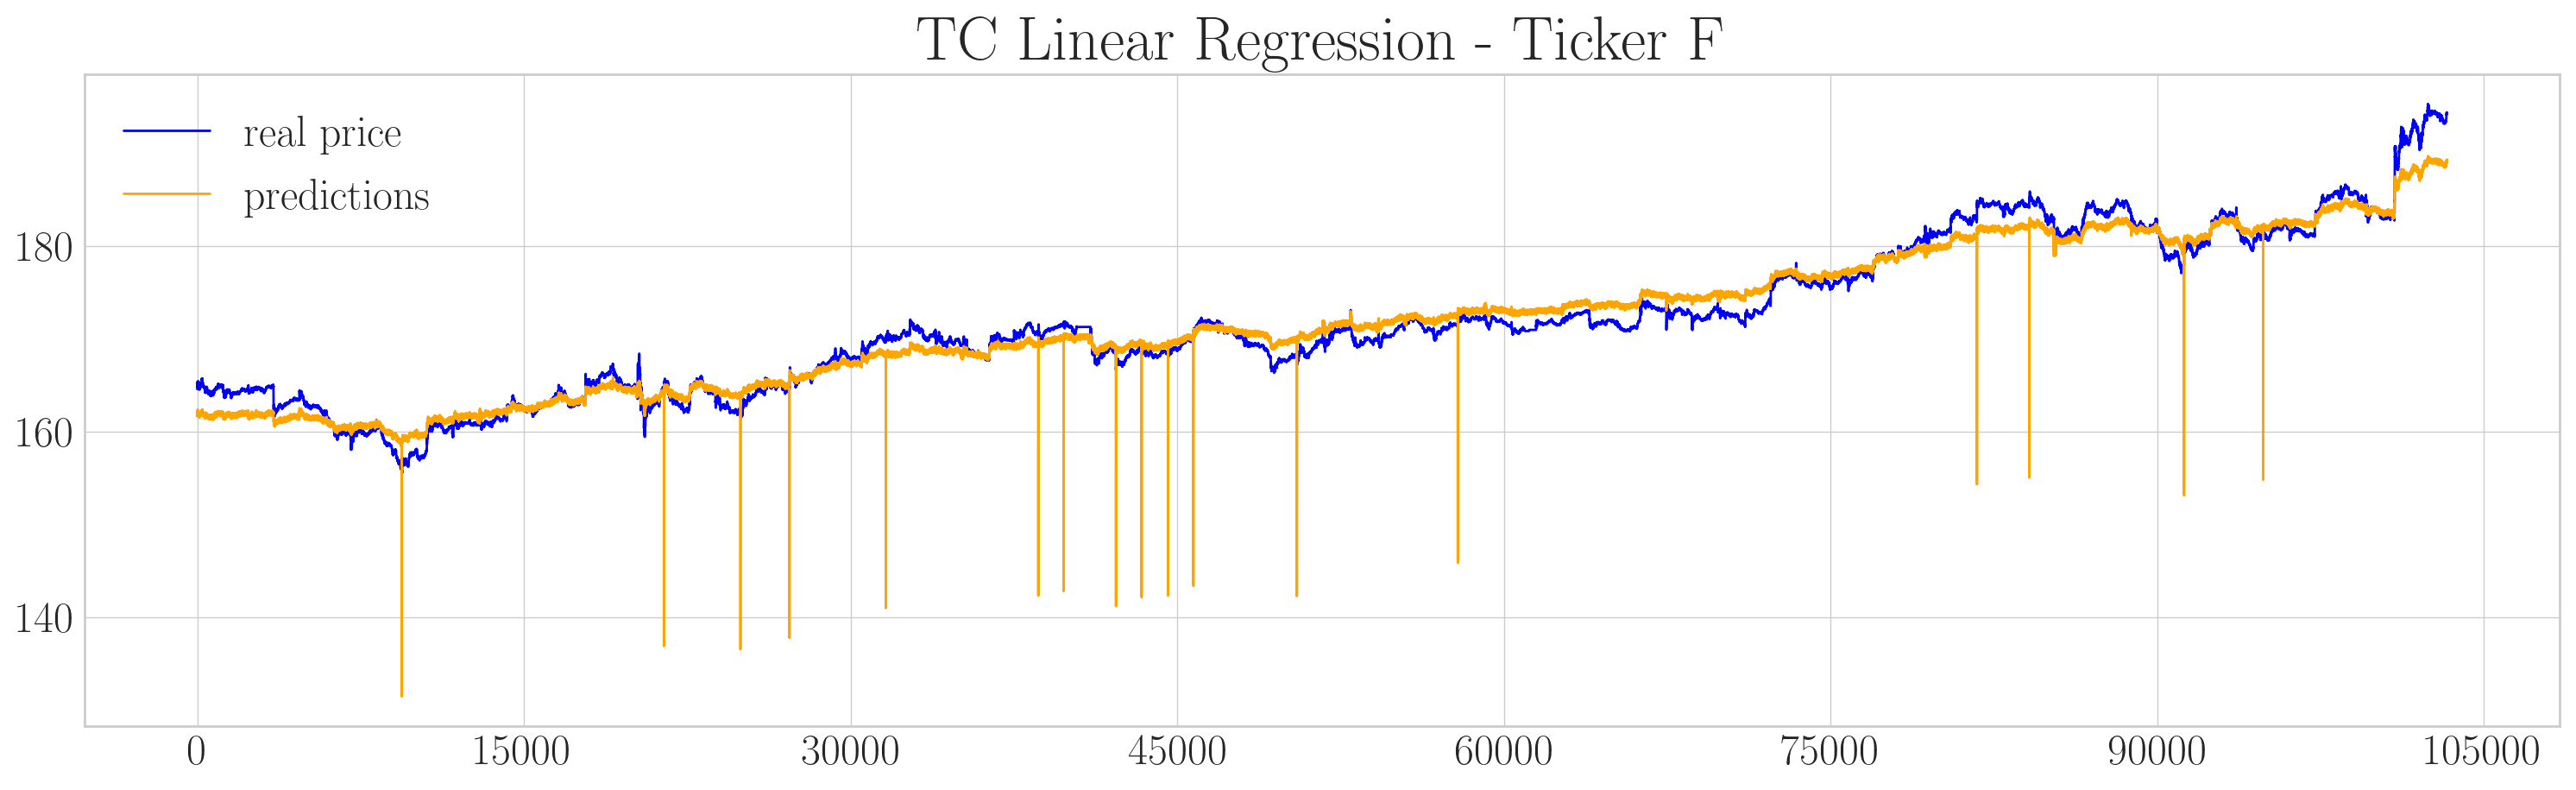

In [308]:
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(MaxNLocator(10)) 
fig.set_size_inches(18.5, 5)

preds = lin_model.predict(test_data)
test_open = test_data['open']

# preds
plt.title('TC Linear Regression - Ticker F')
ax.plot(test_open, color="blue",  linewidth=1, label="real price")
ax.plot(preds, color="orange", linewidth=1, label="predictions")


ax.legend()

In [310]:
ticker_dfs = [df_A, df_B, df_C, df_D, df_E, 
              df_F, df_G, df_H, df_I, df_J]
i = 0
for df in ticker_dfs:

    data = tc.SFrame(df) # Full df
    train_data, test_data = data.random_split(0.75) # Random split
    features = ['high', 'low', 'close', 'time', "day", 'weekday', 'week_begin', 'week_end',] 
#             'am_pm', 'hr', 'datetime',]
    lin_model = tc.linear_regression.create(train_data, target='open', 
                                            features=features, verbose=False)
#     coefficients = model.coefficients
    print(tickers[i], '\n') 
#           "Coefficients:", coefficients)
    predictions = lin_model.predict(test_data) # on test set
    results = model.evaluate(test_data)
    print(results, "\n \n")
    i = i + 1

A 

{'max_error': 37.52365411839054, 'rmse': 16.147191730006398} 
 
 

B 

{'max_error': 57.053515956415765, 'rmse': 33.20309404399821} 
 
 

C 

{'max_error': 64.07151016335568, 'rmse': 39.23684409179668} 
 
 

D 

{'max_error': 77.63802707193409, 'rmse': 41.9312049608619} 
 
 

E 

{'max_error': 46.90399692180674, 'rmse': 25.60469087970311} 
 
 

F 

{'max_error': 45.7009470774903, 'rmse': 11.530389387942124} 
 
 

G 

{'max_error': 43.44616905660581, 'rmse': 14.63930488639044} 
 
 

H 

{'max_error': 76.56447112869324, 'rmse': 45.14132052658486} 
 
 

I 

{'max_error': 43.93244791023619, 'rmse': 14.214628173012484} 
 
 

J 

{'max_error': 53.361053712431385, 'rmse': 12.48779311727088} 
 
 



#### Random Forest

In [318]:
import turicreate as tc

# load data
data =  tc.SFrame(df_F)

# train-test split
train_data, test_data = data.random_split(0.8)

# create model
rf_model = tc.random_forest_regression.create(train_data, target = 'open',
                                           max_iterations = 2,
                                           max_depth =  3)

# save predictions
preds = rf_model.predict(test_data)

# evaluate model and save results
results = rf_model.evaluate(test_data)
print(results)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest regression:

--------------------------------------------------------

Number of examples          : 313596

Number of features          : 12

Number of unpacked features : 12

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.115243     | 4.305511           | 4.274414             | 1.043885                        | 1.044572                          |

| 2         | 0.208325     | 4.279648           | 4.269638             | 1.042378                        | 1.043219                          |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

{'max_error': 4.4296417236328125, 'rmse': 1.0415387034674046}


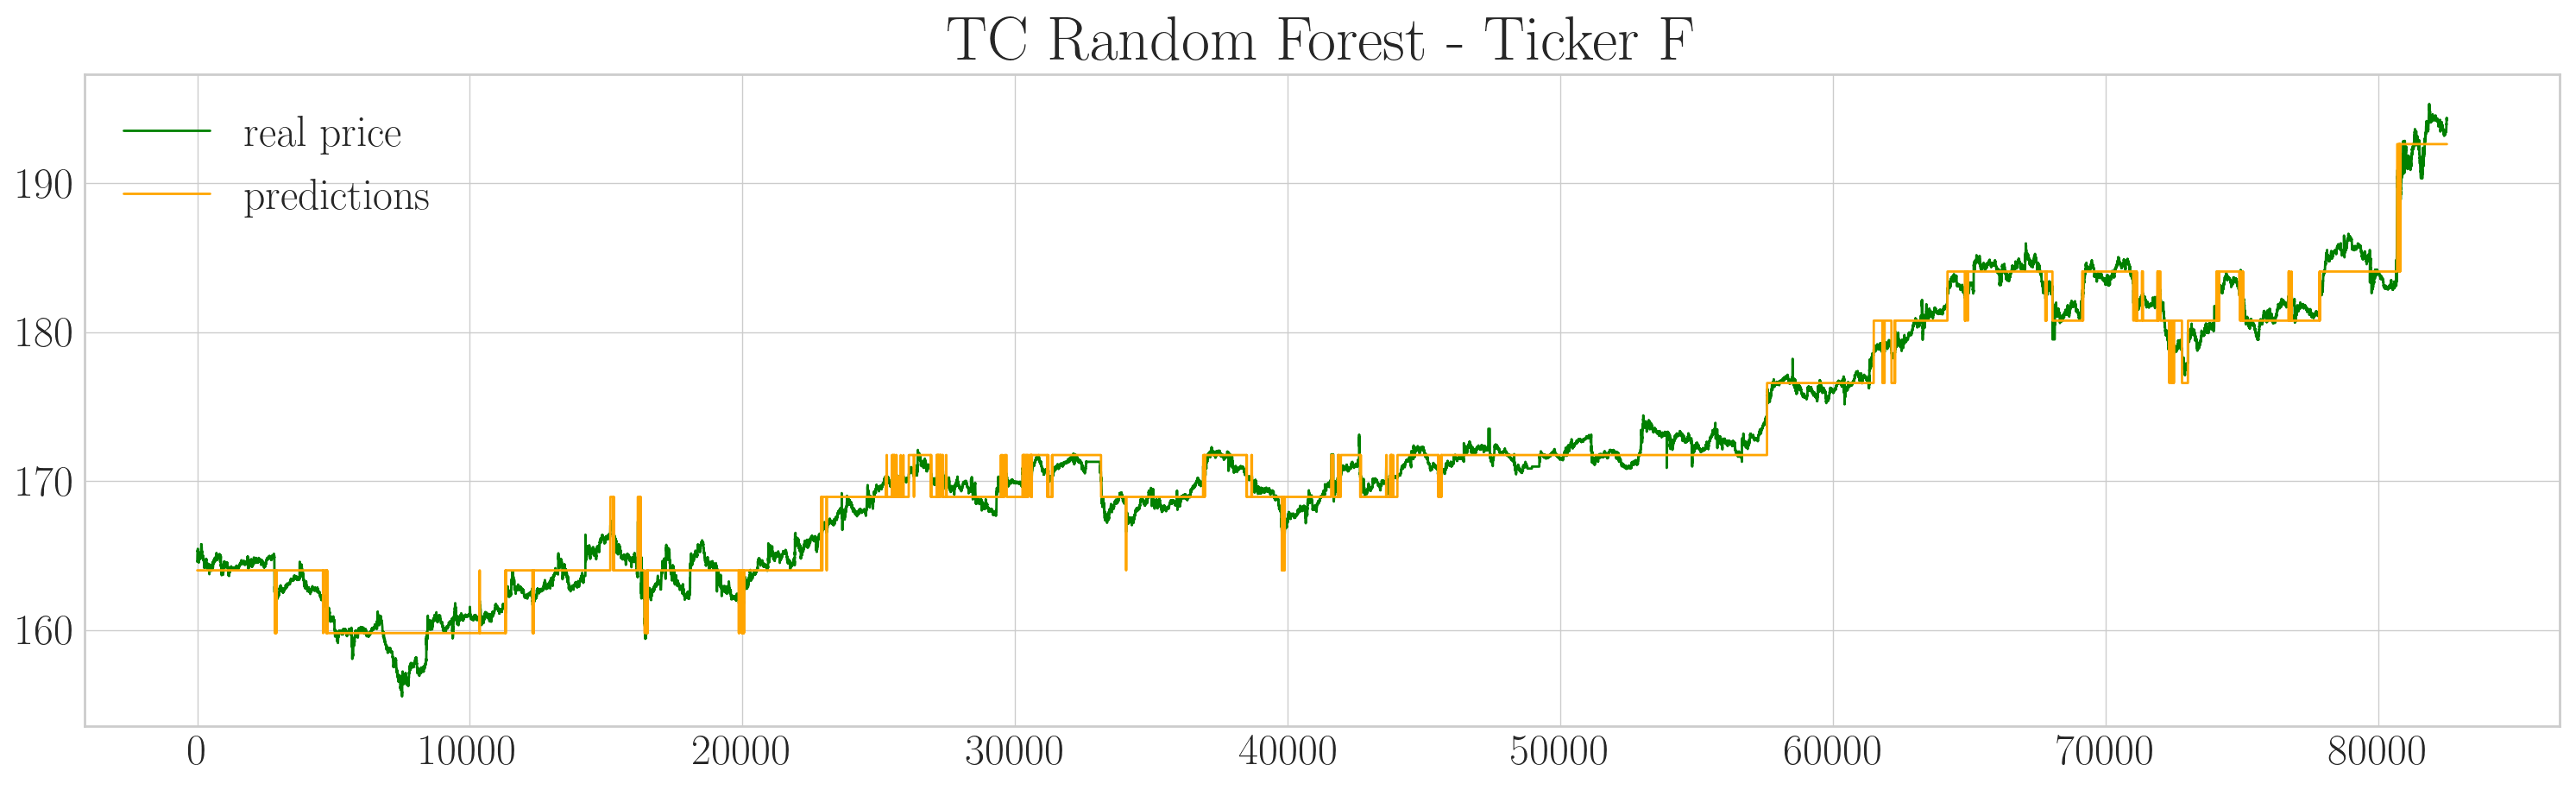

In [320]:
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(MaxNLocator(10)) 
fig.set_size_inches(18.5, 5)

test_open = test_data['open']

# preds
plt.title('TC Random Forest - Ticker F')
ax.plot(test_open, color="green",  linewidth = 1, label="real price")
ax.plot(preds, color="orange", linewidth = 1, label="predictions")
ax.legend()

In [316]:
ticker_dfs = [df_A, df_B, df_C, df_D, df_E, 
              df_F, df_G, df_H, df_I, df_J]
i = 0
for df in ticker_dfs:
    data =  tc.SFrame(df)
    train_data, test_data = data.random_split(0.8)

    rf_model = tc.random_forest_regression.create(train_data, target = 'open',
                                               max_iterations = 2,
                                               max_depth =  3, verbose=False)
    preds = rf_model.predict(test_data)
    results = rf_model.evaluate(test_data)
    print(tickers[i], '\n') 
    print(results, "\n \n")
    i = i + 1

A 

{'max_error': 2.274139404296875, 'rmse': 0.6556217941999374} 
 

B 

{'max_error': 2.0988845825195312, 'rmse': 0.5171794488028941} 
 

C 

{'max_error': 2.1486129760742188, 'rmse': 0.5017711114177166} 
 

D 

{'max_error': 7.909881591796875, 'rmse': 1.6656381493318935} 
 

E 

{'max_error': 2.4343719482421875, 'rmse': 0.625156161309699} 
 

F 

{'max_error': 4.27215576171875, 'rmse': 1.0447198528043682} 
 

G 

{'max_error': 5.4174041748046875, 'rmse': 0.8202544568007255} 
 

H 

{'max_error': 2.08441162109375, 'rmse': 0.5210268876143359} 
 

I 

{'max_error': 2.944000244140625, 'rmse': 0.9799720601251918} 
 

J 

{'max_error': 3.5295562744140625, 'rmse': 0.9468282739527072} 
 



## Final Predictions & Submission Formatting

#### Create data set for predictions

In [81]:
# a repeating list of day numbers corresponding to 9 days in the future
days = list(itertools.chain.from_iterable(itertools.repeat(x, 5040) for x in range(88,97)))

# 9 days worth of 5-second interval time stamps
times = list(df_C['time'])[0:45360] # df C has no missing times/days

# input data frame
input_df = pd.DataFrame({'time': times, 'day': days,})
input_data = tc.SFrame(input_df)

In [ ]:
out_df_ls = []
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
ticker_dfs = [df_A, df_B, df_C, df_D, df_E, df_F, df_G, df_H, df_I, df_J]
i = 0

for df in ticker_dfs: 
    
    # TRAIN MODEL
    data = tc.SFrame(df)
    train_data, test_data = data.random_split(0.8)
    model = tc.linear_regression.create(train_data, target='open', features = ['high','low', 'close','time'])
    

    # FORMAT PREDICTIONS
    preds = model.predict(input_data)
    pres = [letters[i]+'-'+str(x) for x in days]
    ids = [x+'-'+y for x, y in zip(pres, times)]
    output_df = pd.DataFrame({'day': days, 
                              'time': times,
                              'id': ids, 
                              'open': preds})
    out_df_ls.append(output_df)
    
    i = i + 1

In [ ]:
out_df_ls

In [ ]:
final_df = pd.concat(out_df_ls, sort=False)

In [ ]:
final_df

In [ ]:
final_df = final_df.sort_values(by=['time', 'day'])

In [ ]:
final_df.head(40)

In [ ]:
final_df = final_df.drop(columns=['time', 'day'])

In [ ]:
final_df

In [ ]:
final_df.to_csv('preds_4.csv', index=False)